In [1]:
# This data processing is run on the original dataset.  Duplicate records are identified and removed PRIOR to binning being done. 

In [2]:
#import dependencies
import warnings
warnings.filterwarnings('ignore')
print('done')

done


In [3]:
#import dependencies
import numpy as np
import pandas as pd
import os
from pathlib import Path
from collections import Counter
print('done')

done


In [4]:
# import modeling dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2 , f_classif
print('done')

done


In [5]:
#set file path
file_path3 = Path(r'resources\diabetes.csv')

#read file into memory
diabetes_df = pd.read_csv(file_path3)

#validate load
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
#Column_listing
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
#Determine Null Values 
nan_count = diabetes_df.isna().sum(axis = 1)
nan_count

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    0
Length: 253680, dtype: int64

In [8]:
#determine count of duplicate values 
dupe_records = len(diabetes_df)-len(diabetes_df.drop_duplicates())

print(f"There are {dupe_records} duplicate records")

There are 23899 duplicate records


In [9]:
#Drop all duplicate records
diabetes_df = diabetes_df.drop_duplicates() 

#display count of records after drop
diabetes_df.count()

Diabetes_012            229781
HighBP                  229781
HighChol                229781
CholCheck               229781
BMI                     229781
Smoker                  229781
Stroke                  229781
HeartDiseaseorAttack    229781
PhysActivity            229781
Fruits                  229781
Veggies                 229781
HvyAlcoholConsump       229781
AnyHealthcare           229781
NoDocbcCost             229781
GenHlth                 229781
MentHlth                229781
PhysHlth                229781
DiffWalk                229781
Sex                     229781
Age                     229781
Education               229781
Income                  229781
dtype: int64

In [10]:
#Check Data types - all fields should be numeric 
diabetes_df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [11]:
#Count number of each value in Diabetes 012 column
#0-no diabetes, 1-prediabetes 2-diabetes
#this is what we want our model to train on - recommend combining 1&2 into one value to make it binary 'get checked'
diabetes_df['Diabetes_012'].value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

In [12]:
#percentage of each value in Diabetes 012 column
diabetes_df.Diabetes_012.value_counts(normalize=True)

0.0    0.827114
2.0    0.152741
1.0    0.020145
Name: Diabetes_012, dtype: float64

In [13]:
#binning of Diabetes Status 
status_bin_range = [-1, 0, 4]

status_bins = [1, 2]

diabetes_df['Diabetes_Status'] = pd.cut(diabetes_df['Diabetes_012'], status_bin_range, labels=status_bins)

diabetes_df.Diabetes_Status.describe()

count     229781
unique         2
top            1
freq      190055
Name: Diabetes_Status, dtype: int64

In [14]:
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_Status'],
      dtype='object')

In [15]:
#rearrange columns
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012']]

In [16]:
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [17]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_Status       229781 non-null  category
 1   HighBP                229781 non-null  float64 
 2   HighChol              229781 non-null  float64 
 3   CholCheck             229781 non-null  float64 
 4   BMI                   229781 non-null  float64 
 5   Smoker                229781 non-null  float64 
 6   Stroke                229781 non-null  float64 
 7   HeartDiseaseorAttack  229781 non-null  float64 
 8   PhysActivity          229781 non-null  float64 
 9   Fruits                229781 non-null  float64 
 10  Veggies               229781 non-null  float64 
 11  HvyAlcoholConsump     229781 non-null  float64 
 12  AnyHealthcare         229781 non-null  float64 
 13  NoDocbcCost           229781 non-null  float64 
 14  GenHlth               229781 non-nul

In [18]:
#Count number of each value in HighBP Column
# 0 - noHBP, 1 -  HBP 
diabetes_df['HighBP'].value_counts()


0.0    125359
1.0    104422
Name: HighBP, dtype: int64

In [19]:
#percentage of each value 
diabetes_df.HighBP.value_counts(normalize=True)

0.0    0.545559
1.0    0.454441
Name: HighBP, dtype: float64

In [20]:
#Count number of each value in HighChol Column
#0 = no high cholesterol 1 = high cholesterol
diabetes_df['HighChol'].value_counts()


0.0    128273
1.0    101508
Name: HighChol, dtype: int64

In [21]:
#percentage
diabetes_df.HighChol.value_counts(normalize=True)

0.0    0.55824
1.0    0.44176
Name: HighChol, dtype: float64

In [22]:
#Count number of each value in CholCheck Column
#0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
diabetes_df['CholCheck'].value_counts()


1.0    220483
0.0      9298
Name: CholCheck, dtype: int64

In [23]:
#percentage
diabetes_df.CholCheck.value_counts(normalize=True)

1.0    0.959535
0.0    0.040465
Name: CholCheck, dtype: float64

In [24]:
#Count number of each value in BMI Column
#calculate BMI by dividing weight in pounds (lb) by height in inches (in) squared and multiplying by a conversion factor of 703
#Will need to have user enter height and weight of subject 

diabetes_df['BMI'].value_counts()


27.0    21551
26.0    17808
24.0    16537
28.0    14933
25.0    14809
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

In [25]:
#percentage
diabetes_df.BMI.value_counts(normalize=True)

27.0    0.093789
26.0    0.077500
24.0    0.071969
28.0    0.064988
25.0    0.064448
          ...   
85.0    0.000004
91.0    0.000004
86.0    0.000004
90.0    0.000004
78.0    0.000004
Name: BMI, Length: 84, dtype: float64

In [26]:
#Determine bucketing for BMI values 
diabetes_df.BMI.describe()

count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64

In [27]:
# BMI Binning 
# https://qpp.cms.gov/docs/QPP_quality_measure_specifications/CQM-Measures/2019_Measure_128_MIPSCQM.pdf
# BMI 1 is less than 18.5
# BMI 2  is 18.5 to 24.9,
# BMI 3  is 25.0 to 29.9
# BMI 4 is 30.0 or higher

In [28]:
#define ranges
bmi_bin_range = [0, 18.5, 24.9, 29.9, 100]

#define bins 
bmi_bins = [1, 2, 3, 4]

#sort data into bins
diabetes_df['BMI_Range'] = pd.cut(diabetes_df['BMI'], bmi_bin_range, labels=bmi_bins)

#describe model after binning
diabetes_df.BMI_Range.describe()

count     229781
unique         4
top            4
freq       84942
Name: BMI_Range, dtype: int64

In [29]:
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012', 'BMI_Range'],
      dtype='object')

In [30]:
#re-sort columns 
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012', 'BMI']]

In [31]:
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012,BMI
0,1,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0,40.0
1,1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0,25.0
2,1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0,28.0
3,1,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0,27.0
4,1,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0,24.0


In [32]:
#Count number of each value in Smoker Column
#Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
diabetes_df['Smoker'].value_counts()


0.0    122781
1.0    107000
Name: Smoker, dtype: int64

In [33]:
#percentage
diabetes_df.Smoker.value_counts(normalize=True)

0.0    0.534339
1.0    0.465661
Name: Smoker, dtype: float64

In [34]:
#Count number of each value in Stroke Column
#(Ever told) you had a stroke. 0 = no 1 = yes
diabetes_df['Stroke'].value_counts()

0.0    219497
1.0     10284
Name: Stroke, dtype: int64

In [35]:
#Percentage 
diabetes_df.Stroke.value_counts(normalize=True)

0.0    0.955244
1.0    0.044756
Name: Stroke, dtype: float64

In [36]:
#Count number of each value in HeartDiseaseorAttack Column
#coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
diabetes_df['HeartDiseaseorAttack'].value_counts()


0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64

In [37]:
#percentage
diabetes_df.HeartDiseaseorAttack.value_counts(normalize=True)

0.0    0.896784
1.0    0.103216
Name: HeartDiseaseorAttack, dtype: float64

In [38]:
#Count number of each value in PhysActivity Column
#physical activity in past 30 days - not including job 0 = no 1 = yes
diabetes_df['PhysActivity'].value_counts()


1.0    168511
0.0     61270
Name: PhysActivity, dtype: int64

In [39]:
#percentage
diabetes_df.PhysActivity.value_counts(normalize=True)

1.0    0.733355
0.0    0.266645
Name: PhysActivity, dtype: float64

In [40]:
#Count number of each value in Fruits Column
#Consume Fruit 1 or more times per day 0 = no 1 = yes
diabetes_df['Fruits'].value_counts()


1.0    140848
0.0     88933
Name: Fruits, dtype: int64

In [41]:
#percentage
diabetes_df.Fruits.value_counts(normalize=True)

1.0    0.612966
0.0    0.387034
Name: Fruits, dtype: float64

In [42]:
#Count number of each value in Veggies Column
#Consume Vegetables 1 or more times per day 0 = no 1 = yes
diabetes_df['Veggies'].value_counts()


1.0    182633
0.0     47148
Name: Veggies, dtype: int64

In [43]:
#percentage
diabetes_df.Veggies.value_counts(normalize=True)

1.0    0.794813
0.0    0.205187
Name: Veggies, dtype: float64

In [44]:
#Count number of each value in HvyAlcoholConsump Column
#Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
diabetes_df['HvyAlcoholConsump'].value_counts()

0.0    215831
1.0     13950
Name: HvyAlcoholConsump, dtype: int64

In [45]:
#percentage
diabetes_df.HvyAlcoholConsump.value_counts(normalize=True)

0.0    0.93929
1.0    0.06071
Name: HvyAlcoholConsump, dtype: float64

In [46]:
#Count number of each value in AnyHealthcare Column
#Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
diabetes_df['AnyHealthcare'].value_counts()

1.0    217390
0.0     12391
Name: AnyHealthcare, dtype: int64

In [47]:
#percentage
diabetes_df.AnyHealthcare.value_counts(normalize=True)

1.0    0.946075
0.0    0.053925
Name: AnyHealthcare, dtype: float64

In [48]:
#Count number of each value in NoDocbcCost Column
#Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
diabetes_df['NoDocbcCost'].value_counts()

0.0    208455
1.0     21326
Name: NoDocbcCost, dtype: int64

In [49]:
#percentage
diabetes_df.NoDocbcCost.value_counts(normalize=True)

0.0    0.90719
1.0    0.09281
Name: NoDocbcCost, dtype: float64

In [50]:
#Count number of each value in GenHlth Column
#Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
diabetes_df['GenHlth'].value_counts()

2.0    77536
3.0    73714
1.0    34907
4.0    31546
5.0    12078
Name: GenHlth, dtype: int64

In [51]:
#percentage
diabetes_df.GenHlth.value_counts(normalize=True)

2.0    0.337434
3.0    0.320801
1.0    0.151914
4.0    0.137287
5.0    0.052563
Name: GenHlth, dtype: float64

In [52]:
#Count number of each value in MentHlth Column
#Now thinking about your mental health, which includes stress, depression, and problems with 
#emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
diabetes_df['MentHlth'].value_counts()


0.0     152623
2.0      12697
30.0     12080
5.0       8913
1.0       8309
3.0       7302
10.0      6352
15.0      5501
4.0       3774
20.0      3362
7.0       3090
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: MentHlth, dtype: int64

In [53]:
#percentage
diabetes_df.MentHlth.value_counts(normalize=True)

0.0     0.664211
2.0     0.055257
30.0    0.052572
5.0     0.038789
1.0     0.036161
3.0     0.031778
10.0    0.027644
15.0    0.023940
4.0     0.016424
20.0    0.014631
7.0     0.013448
25.0    0.005170
14.0    0.005079
6.0     0.004300
8.0     0.002781
12.0    0.001732
28.0    0.001423
21.0    0.000988
29.0    0.000688
18.0    0.000422
9.0     0.000396
16.0    0.000383
27.0    0.000344
22.0    0.000274
17.0    0.000235
26.0    0.000196
11.0    0.000178
13.0    0.000178
23.0    0.000165
24.0    0.000144
19.0    0.000070
Name: MentHlth, dtype: float64

In [54]:
#### Buckets 
# 0 Days 
# 1-5 Days
# 6-10 Days
# 11-15 Days
# 16-20 Days
# 21-25 Days
# 26-30 Days

In [55]:
mhealth_bin_range = [-1, 5, 10, 15, 20, 25, 32]

mhealth_bins = [1, 2, 3, 4, 5, 6]

diabetes_df['Mental_Health_Range'] = pd.cut(diabetes_df['MentHlth'], mhealth_bin_range, labels=mhealth_bins)

diabetes_df.Mental_Health_Range.describe()

count     229781
unique         6
top            1
freq      193618
Name: Mental_Health_Range, dtype: int64

In [56]:
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'Mental_Health_Range'],
      dtype='object')

In [57]:
#reorder columns 
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth']]

In [58]:
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Mental_Health_Range,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012,BMI,MentHlth
0,1,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,4,15.0,1.0,0.0,9.0,4.0,3.0,0.0,40.0,18.0
1,1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,1,0.0,0.0,0.0,7.0,6.0,1.0,0.0,25.0,0.0
2,1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,6,30.0,1.0,0.0,9.0,4.0,8.0,0.0,28.0,30.0
3,1,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1,0.0,0.0,0.0,11.0,3.0,6.0,0.0,27.0,0.0
4,1,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1,0.0,0.0,0.0,11.0,5.0,4.0,0.0,24.0,3.0


In [59]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_Status       229781 non-null  category
 1   HighBP                229781 non-null  float64 
 2   HighChol              229781 non-null  float64 
 3   CholCheck             229781 non-null  float64 
 4   BMI_Range             229781 non-null  category
 5   Smoker                229781 non-null  float64 
 6   Stroke                229781 non-null  float64 
 7   HeartDiseaseorAttack  229781 non-null  float64 
 8   PhysActivity          229781 non-null  float64 
 9   Fruits                229781 non-null  float64 
 10  Veggies               229781 non-null  float64 
 11  HvyAlcoholConsump     229781 non-null  float64 
 12  AnyHealthcare         229781 non-null  float64 
 13  NoDocbcCost           229781 non-null  float64 
 14  GenHlth               229781 non-nul

In [60]:
#Count number of each value in PhysHlth Column
#Now thinking about your physical health, which includes physical illness and injury, for how many days 
#during the past 30 days was your physical health not good? scale 1-30 days
diabetes_df['PhysHlth'].value_counts()


0.0     136877
30.0     19386
2.0      14495
1.0      11074
3.0       8435
5.0       7597
10.0      5588
15.0      4914
7.0       4531
4.0       4521
20.0      3273
14.0      2584
25.0      1336
6.0       1328
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: PhysHlth, dtype: int64

In [61]:
#percentage
diabetes_df.PhysHlth.value_counts(normalize=True)

0.0     0.595685
30.0    0.084367
2.0     0.063082
1.0     0.048194
3.0     0.036709
5.0     0.033062
10.0    0.024319
15.0    0.021386
7.0     0.019719
4.0     0.019675
20.0    0.014244
14.0    0.011245
25.0    0.005814
6.0     0.005779
8.0     0.003521
21.0    0.002885
12.0    0.002515
28.0    0.002272
29.0    0.000936
9.0     0.000779
18.0    0.000661
16.0    0.000487
27.0    0.000431
17.0    0.000418
24.0    0.000313
22.0    0.000305
26.0    0.000300
13.0    0.000296
11.0    0.000261
23.0    0.000244
19.0    0.000096
Name: PhysHlth, dtype: float64

In [62]:
phealth_bin_range = [-1, 5, 10, 15, 20, 25, 32]

phealth_bins = [1, 2, 3, 4, 5, 6]

diabetes_df['Physical_Health_Range'] = pd.cut(diabetes_df['PhysHlth'], phealth_bin_range, labels=phealth_bins)

diabetes_df.Physical_Health_Range.describe()

count     229781
unique         6
top            1
freq      182999
Name: Physical_Health_Range, dtype: int64

In [63]:
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth',
       'Physical_Health_Range'],
      dtype='object')

In [64]:
#reorganize columns 
diabetes_df = diabetes_df[['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'Physical_Health_Range', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth', 'PhysHlth']]

In [65]:
diabetes_df.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Physical_Health_Range,DiffWalk,Sex,Age,Education,Income,Diabetes_012,BMI,MentHlth,PhysHlth
0,1,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,3,1.0,0.0,9.0,4.0,3.0,0.0,40.0,18.0,15.0
1,1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,1,0.0,0.0,7.0,6.0,1.0,0.0,25.0,0.0,0.0
2,1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,6,1.0,0.0,9.0,4.0,8.0,0.0,28.0,30.0,30.0
3,1,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1,0.0,0.0,11.0,3.0,6.0,0.0,27.0,0.0,0.0
4,1,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1,0.0,0.0,11.0,5.0,4.0,0.0,24.0,3.0,0.0


In [66]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Diabetes_Status        229781 non-null  category
 1   HighBP                 229781 non-null  float64 
 2   HighChol               229781 non-null  float64 
 3   CholCheck              229781 non-null  float64 
 4   BMI_Range              229781 non-null  category
 5   Smoker                 229781 non-null  float64 
 6   Stroke                 229781 non-null  float64 
 7   HeartDiseaseorAttack   229781 non-null  float64 
 8   PhysActivity           229781 non-null  float64 
 9   Fruits                 229781 non-null  float64 
 10  Veggies                229781 non-null  float64 
 11  HvyAlcoholConsump      229781 non-null  float64 
 12  AnyHealthcare          229781 non-null  float64 
 13  NoDocbcCost            229781 non-null  float64 
 14  GenHlth             

In [67]:
#Count number of each value in DiffWalk Column
#Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
diabetes_df['DiffWalk'].value_counts()


0.0    187155
1.0     42626
Name: DiffWalk, dtype: int64

In [68]:
#percentage
diabetes_df.DiffWalk.value_counts(normalize=True)

0.0    0.814493
1.0    0.185507
Name: DiffWalk, dtype: float64

In [69]:
#Count number of each value in Sex Column
#0 = female 1 = male
diabetes_df['Sex'].value_counts()

0.0    128854
1.0    100927
Name: Sex, dtype: int64

In [70]:
#percentage
diabetes_df.Sex.value_counts(normalize=True)

0.0    0.560769
1.0    0.439231
Name: Sex, dtype: float64

In [71]:
#Count number of each value in Age Column
#13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
#link to codebook here: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
diabetes_df['Age'].value_counts()

9.0     29736
10.0    29168
8.0     27301
7.0     23140
11.0    22041
6.0     17299
13.0    16813
12.0    15394
5.0     14050
4.0     12234
3.0     10025
2.0      7068
1.0      5512
Name: Age, dtype: int64

In [72]:
#Percentage
diabetes_df.Age.value_counts(normalize=True)

9.0     0.129410
10.0    0.126938
8.0     0.118813
7.0     0.100705
11.0    0.095922
6.0     0.075285
13.0    0.073170
12.0    0.066994
5.0     0.061145
4.0     0.053242
3.0     0.043628
2.0     0.030760
1.0     0.023988
Name: Age, dtype: float64

In [73]:
#Count number of each value in Education Column
#Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 
#2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 
#5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
#link to codebook here: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
diabetes_df['Education'].value_counts()


6.0    88443
5.0    66499
4.0    61158
3.0     9467
2.0     4040
1.0      174
Name: Education, dtype: int64

In [74]:
#percentage
diabetes_df.Education.value_counts(normalize=True)

6.0    0.384901
5.0    0.289402
4.0    0.266158
3.0    0.041200
2.0    0.017582
1.0    0.000757
Name: Education, dtype: float64

In [75]:
#Count number of each value in Income Column
#Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
#link to codebook here https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
diabetes_df['Income'].value_counts()


8.0    71818
7.0    40189
6.0    35001
5.0    25345
4.0    19957
3.0    15922
2.0    11757
1.0     9792
Name: Income, dtype: int64

In [76]:
#percentage
diabetes_df.Income.value_counts(normalize=True)

8.0    0.312550
7.0    0.174901
6.0    0.152323
5.0    0.110301
4.0    0.086852
3.0    0.069292
2.0    0.051166
1.0    0.042614
Name: Income, dtype: float64

In [77]:
#visualize data for further analysis 
#Code suggestion per developer of dataset 
# https://www.kaggle.com/code/abosalah22/99-accuracy-with-eda-using-different-ml-algorithm

df_vis= diabetes_df.copy() 

print('done')

done


In [78]:
#assess number of unique values for each column 
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_Status,2
HighBP,2
HighChol,2
CholCheck,2
BMI_Range,4
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [79]:
#count number of columns
cols = list(df_vis.columns)
cols_df=cols[1:]

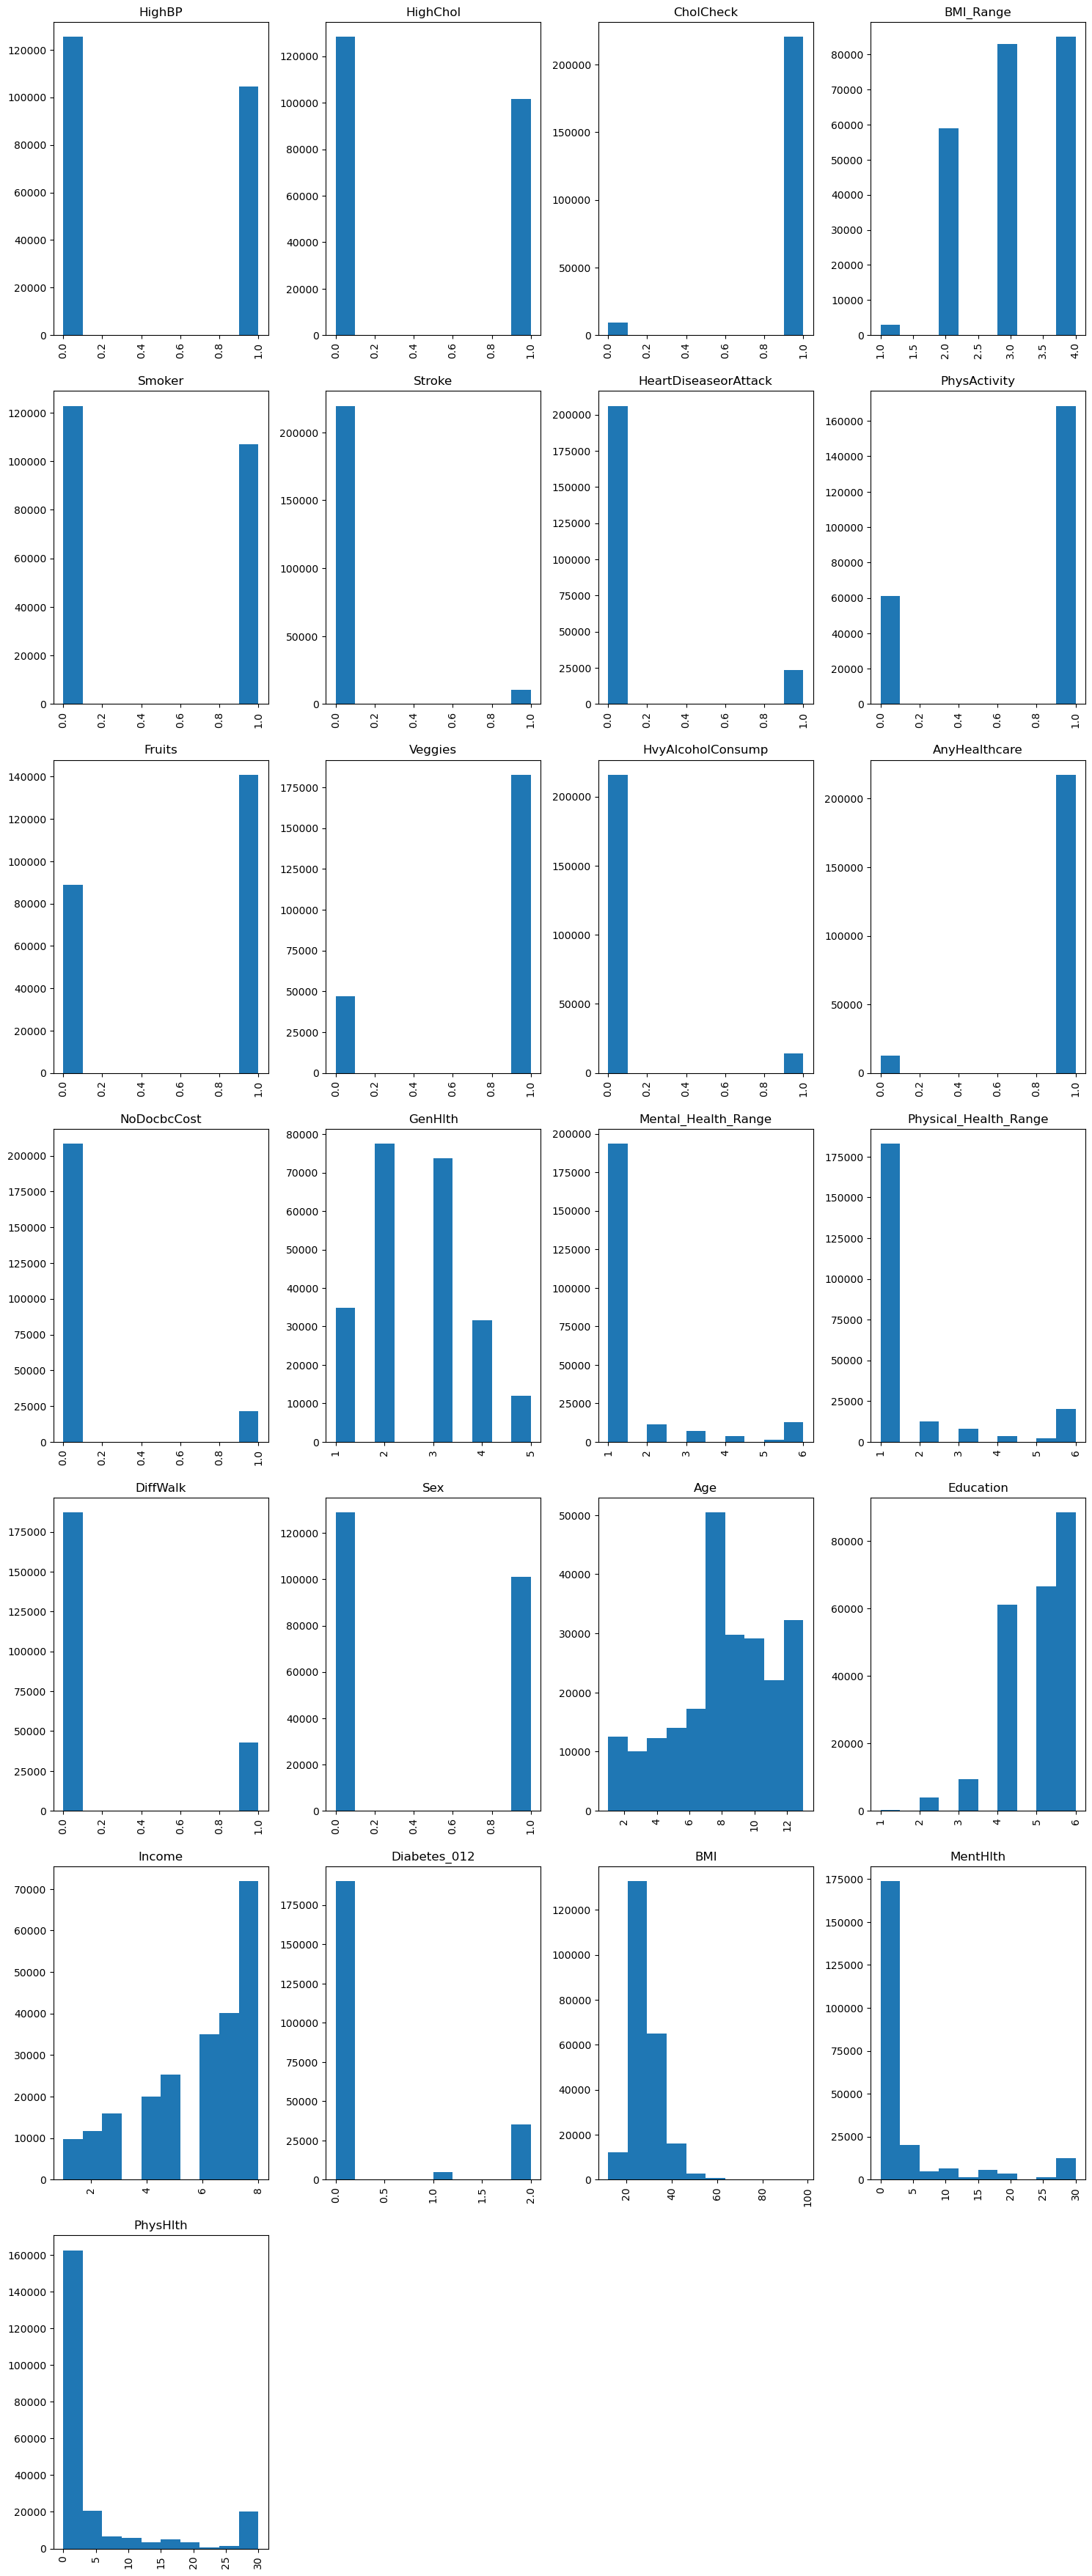

In [80]:
#visualize distributions of answers 
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,4,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

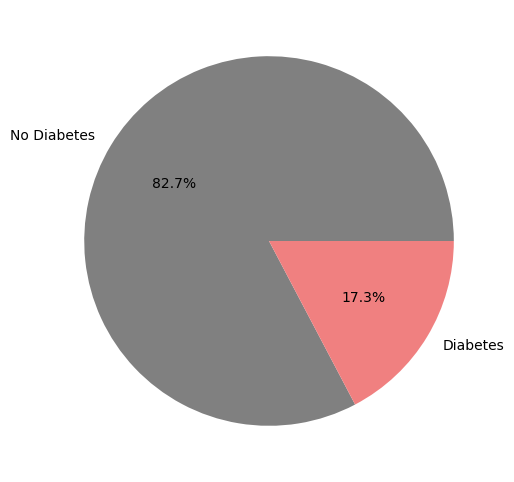

In [81]:
# pie plot of diabetes ratio 
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes']
sizes = [df_vis['Diabetes_Status'].value_counts()[0], df_vis['Diabetes_Status'].value_counts()[1]]
colors = ['grey', 'lightcoral']
plt.pie(sizes, labels=labels, autopct='%.1f%%', colors=colors, data = df_vis);

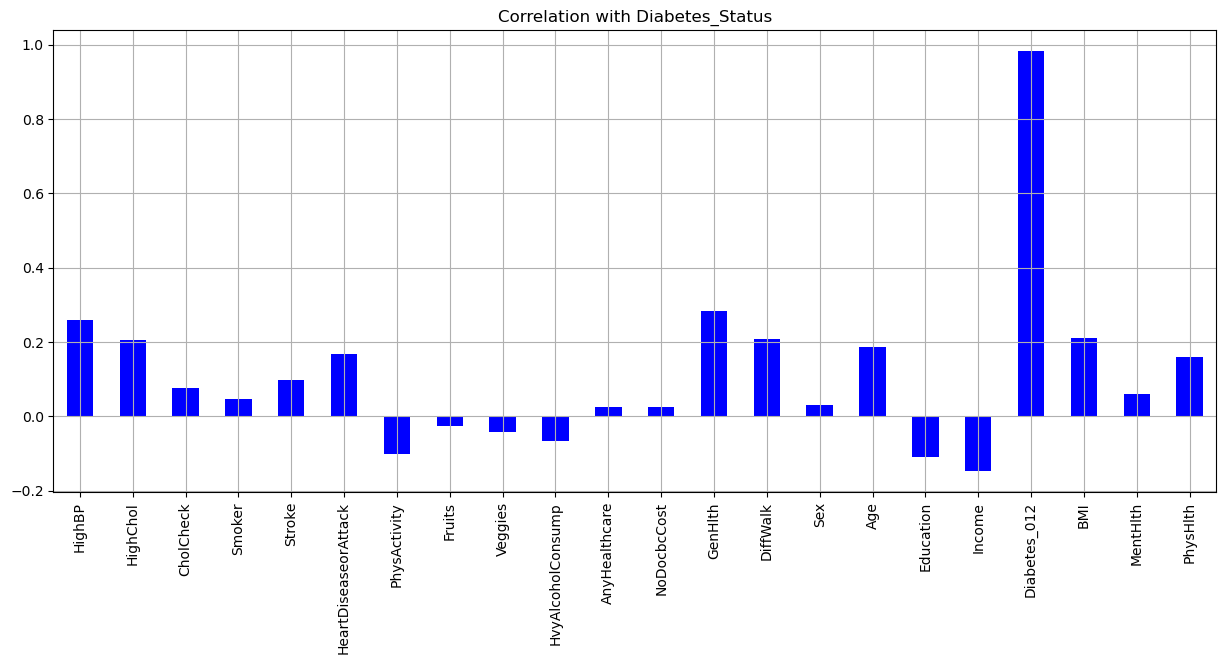

In [82]:
diabetes_df.drop('Diabetes_Status', axis=1).corrwith(diabetes_df.Diabetes_Status).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_Status",color="blue");

Highly Correlated
- High BP
- High Cholesterol
- Cholestoral Check
- Smoker
- Stroke
- Heart Disease or  Heart Attack
- General Health
- Difficulty Walking
- Sex
- Age
- BMI
- Mental Health Days
- Physical Health Days 

Loosely Correlated
- Physical Activity
- Fruits
- Veggies
- Heavy Alcohol Consumption
- Any Healthcare
- No Doctor due to cost 
- Education
- Income 

In [83]:
#Preprocessing 

diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'Physical_Health_Range', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income', 'Diabetes_012', 'BMI', 'MentHlth',
       'PhysHlth'],
      dtype='object')

In [84]:
#drop original columns from binning 

#drop diabetes_012 
diabetes_df = diabetes_df.drop(["Diabetes_012"], axis=1)

print("done")


done


In [85]:
#drop BMI
diabetes_df = diabetes_df.drop(["BMI"], axis=1)

print("done")

done


In [86]:
#drop MentHlth
diabetes_df = diabetes_df.drop(["MentHlth"], axis=1)

print("done")

done


In [87]:
#drop PhysHlth
diabetes_df = diabetes_df.drop(["PhysHlth"], axis=1)

print("done")

done


In [88]:
diabetes_df.columns

Index(['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck', 'BMI_Range',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'Mental_Health_Range', 'Physical_Health_Range', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [89]:
#split target column out of data 
y = diabetes_df['Diabetes_Status']

y

0         1
1         1
2         1
3         1
4         1
         ..
253675    1
253676    2
253677    1
253678    1
253679    2
Name: Diabetes_Status, Length: 229781, dtype: category
Categories (2, int64): [1 < 2]

In [90]:
x = diabetes_df.drop(['Diabetes_Status'], axis=1)

x

,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,Mental_Health_Range,Physical_Health_Range,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,4,3,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,1,1,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,6,6,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1,1,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1,1,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,4,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1,1,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,1,1,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1,1,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,2,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1,1,0.0,1.0,7.0,5.0,1.0


In [91]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=44, shuffle =True)

print("done")

done


In [92]:
diabetes_df.to_csv('results/diabetes_sample_one.csv', encoding='utf-8')
print('done')

done
